In [1]:
import cv2
import matplotlib.pyplot  as plt

(900, 1200, 3)


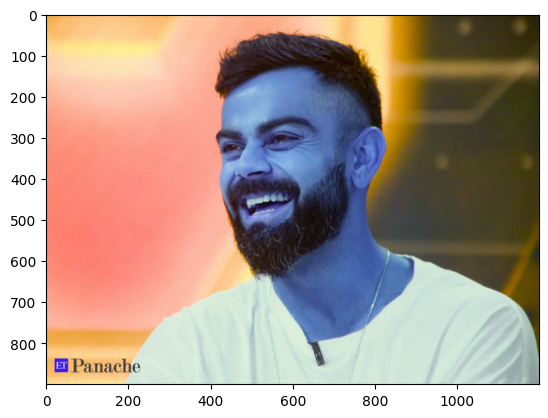

In [2]:
img = cv2.imread("test_images/0b43460429.jpg")
print(img.shape)
plt.imshow(img, cmap='gray')

In [4]:
faces_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_eye.xml")


faces  = faces_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[328, 163, 374, 374]], dtype=int32)

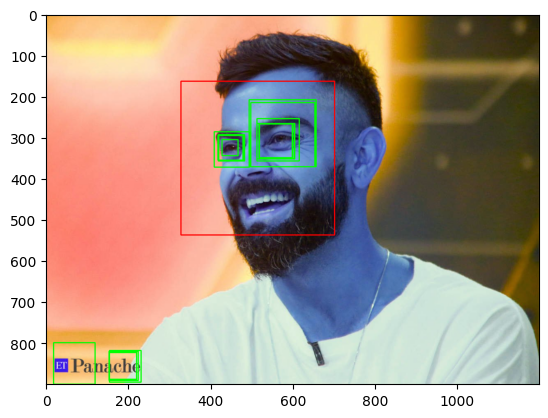

In [9]:
for x, y, w, h in faces:
        face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        eyes = eye_cascade.detectMultiScale(img)
        for (x2,y2,w2,h2) in eyes:
                face_img = cv2.rectangle(face_img, (x2, y2), (x2+w2, y2+h2), (0, 255, 0), 2)

plt.imshow(face_img)

In [11]:
def get_cropped(img_path="test_images/0b43460429.jpg"):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    faces = faces_cascade.detectMultiScale(gray, 1.3, 5)
    for x, y, w, h in faces:   
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]     
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    

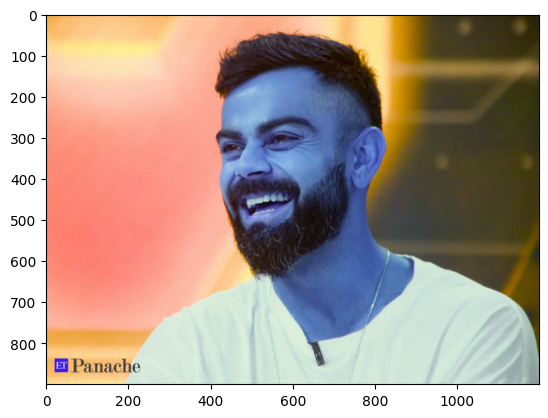

In [12]:
img = cv2.imread("test_images/0b43460429.jpg")
plt.imshow(img)

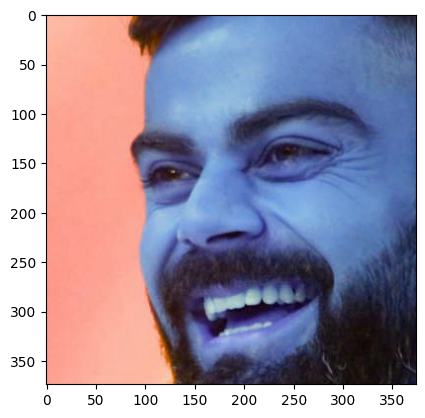

In [13]:
cropped_img = get_cropped()
plt.imshow(cropped_img)

In [ ]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

In [ ]:
import shutil
# if os.path.exists(path_to_cr_data):
#      shutil.rmtree(path_to_cr_data)
# os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 